Use thinning algorithm

https://homepages.inf.ed.ac.uk/rbf/HIPR2/thin.htm

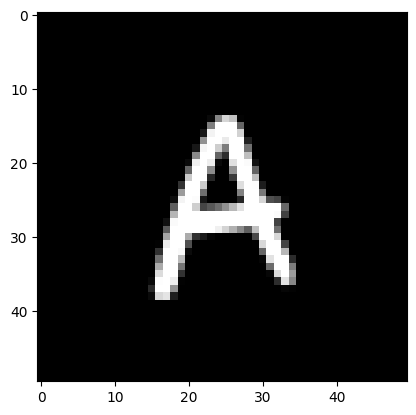

In [2]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt


def create_image(size, bgColor, message, font, fontColor):
    W, H = size
    image = Image.new('RGB', size, bgColor)
    draw = ImageDraw.Draw(image)
    _, _, w, h = draw.textbbox((0, 0), message, font=font)
    draw.text(((W-w)/2, 0), message, font=font, fill=fontColor)
    return image

image_size = 50
font_size = int(image_size * 0.9)

myFont = ImageFont.truetype('./fonts/NanumPenScript-Regular.ttf', font_size)
myMessage = 'A'
myImage = create_image((image_size, image_size), 'black', myMessage, myFont, 'white')
# myImage.save('hello_world.png', "PNG")

plt.imshow(myImage)

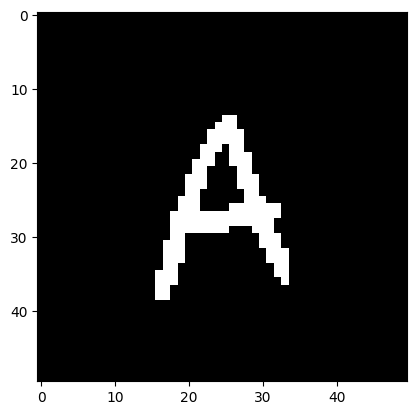

In [45]:
# thresholding

from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np


def create_image(size, bgColor, message, font, fontColor):
    W, H = size
    image = Image.new('RGB', size, bgColor)
    draw = ImageDraw.Draw(image)
    _, _, w, h = draw.textbbox((0, 0), message, font=font)
    draw.text(((W-w)/2, 0), message, font=font, fill=fontColor)
    return image

image_size = 50
font_size = int(image_size * 0.9)

myFont = ImageFont.truetype('./fonts/NanumPenScript-Regular.ttf', font_size)
myMessage = 'A'
myImage = create_image((image_size, image_size), 'black', myMessage, myFont, 'white')
reference = np.array(myImage.convert("L"))
threshold = 180
binary = reference > threshold
thresholded = Image.fromarray(binary)


plt.imshow(thresholded)

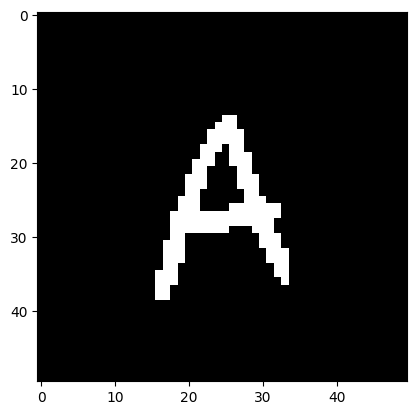

In [46]:
#skelotonizing

matrix1 = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1]])
matrix2 = np.array([[0, 0, 0], [1, 1, 0], [0, 1, 0]])

for i in range(binary.shape[0] - 2):
    for j in range(binary.shape[1] - 2):
        if np.all(binary[i:i+3, j:j+3] == matrix1) or np.all(binary[i:i+3, j:j+3] == matrix2):
            binary[i+1, j+1] = 0

skeletoned = Image.fromarray(binary)
plt.imshow(skeletoned)

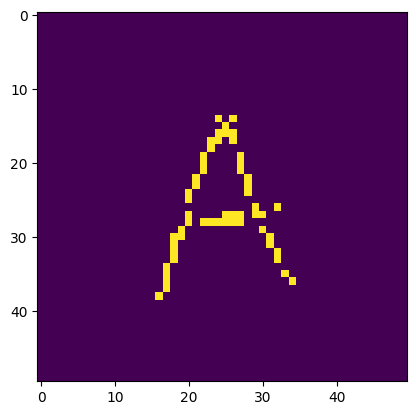

In [47]:
import cv2
import numpy as np

# Convert the Pillow image to a NumPy array
numpy_image = np.array(myImage)

# Now, you can use the NumPy array with OpenCV (cv2)
cv2_image = cv2.cvtColor(numpy_image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding if not already binary
_, img = cv2.threshold(cv2_image, 128, 255, cv2.THRESH_BINARY)


# img = cv2.imread('sofsk.png',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True

skeletonized = Image.fromarray(skel * 255)
plt.imshow(skeletonized)
# print(skel)

# cv2.imshow("skel",skel)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1)


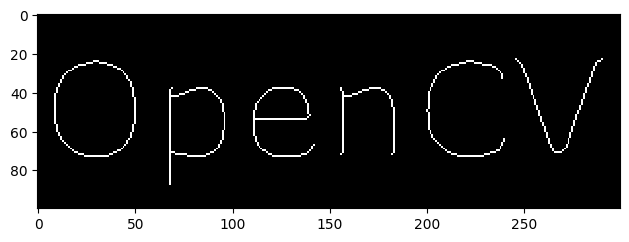

In [48]:
from skimage import io, color, morphology
import numpy as np

# Load your binary image (make sure it's binary)
binary_image = io.imread('sofsk.png', as_gray=True)

# Apply binary thresholding if not already binary
binary_image = (binary_image > 0.5).astype(bool)

# Perform skeletonization using the Zhang-Suen thinning algorithm
skeleton = morphology.skeletonize(binary_image)

# Save the connected skeletonized image
io.imsave('connected_skeleton_image.png', skeleton.astype(np.uint8) * 255)

# Display the connected skeletonized image
io.imshow(skeleton)
io.show()

(50, 50)


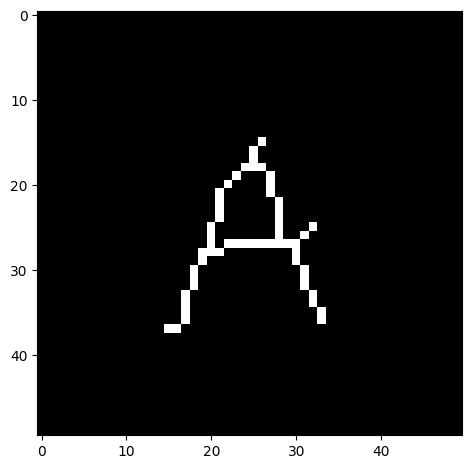

In [49]:
# Convert the Pillow image to a NumPy array
numpy_image = np.array(myImage.convert("L"))
print(numpy_image.shape)

# Load your binary image (make sure it's binary)
# binary_image = io.imread(numpy_image, as_gray=True)

# Apply binary thresholding if not already binary
# binary_image = (binary_image > 0.5).astype(bool)

# Perform skeletonization using the Zhang-Suen thinning algorithm
skeleton = morphology.skeletonize(numpy_image)

# Save the connected skeletonized image
io.imsave('connected_skeleton_image.png', skeleton.astype(np.uint8) * 255)

# Display the connected skeletonized image
image = Image.fromarray(skeleton.astype(np.uint8))
io.imshow(skeleton)
io.show()

In [39]:
# topmost = np.argmax(skeleton, axis=0)
print(skeleton.shape)

(50, 50)


In [50]:
print(skeleton)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [51]:
# find end points
import numpy as np
from scipy import ndimage

# Detect endpoints using the binary hit-or-miss transform

hit_or_miss_kernel = np.array([
    [[0, 1, 0],
     [0, 1, 0],
     [0, 0, 0]],
    [[1, 0, 0],
     [0, 1, 0],
     [0, 0, 0]],
], dtype=np.uint8)

endpoints = ndimage.binary_hit_or_miss(skeleton, structure1=hit_or_miss_kernel[0], structure2=hit_or_miss_kernel[1])

# Get the coordinates of the detected endpoints
endpoints_coordinates = np.transpose(np.where(endpoints))

# Print the coordinates of the detected endpoints
if endpoints_coordinates.size > 0:
    print("Endpoint Coordinates:")
    for coordinate in endpoints_coordinates:
        print(tuple(coordinate))
else:
    print("No endpoints found in the skeletonized image.")


No endpoints found in the skeletonized image.


In [52]:
import numpy as np
from scipy import ndimage

# Load your skeletonized binary image (replace this with your own skeletonized image)
skeleton_image = np.array([
    [0 ,0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
], dtype=np.uint8)

# Define all possible hit-or-miss structuring elements for endpoints
hit_or_miss_kernels1 = np.array([
    [[1, 0, 0],
     [0, 1, 0],
     [0, 0, 0]],
    [[1, 1, 0],
     [0, 1, 0],
     [0, 0, 0]],
    [[0, 1, 0],
     [0, 1, 0],
     [0, 0, 0]],
    [[0, 1, 1],
     [0, 1, 0],
     [0, 0, 0]],
], dtype=np.uint8)

endpoints = np.zeros(skeleton.shape, dtype=np.uint8)

# Detect endpoints using all structuring elements
for kernel in hit_or_miss_kernels1:
    for i in range(4):
        endpoints += ndimage.binary_hit_or_miss(skeleton, structure1=kernel)
        kernel = np.rot90(kernel)

# Get the coordinates of the detected endpoints
endpoints_coordinates = np.transpose(np.where(endpoints))

# Print the coordinates of the detected endpoints
if endpoints_coordinates.size > 0:
    print("Endpoint Coordinates:")
    for coordinate in endpoints_coordinates:
        print(tuple(coordinate))
else:
    print("No endpoints found in the skeletonized image.")


Endpoint Coordinates:
(15, 26)
(25, 32)
(36, 33)
(37, 15)


In [53]:
import numpy as np
from scipy import ndimage

# Define all possible hit-or-miss structuring elements for intersections
hit_or_miss_kernels_1 = np.array([
    [[0, 1, 0],
     [1, 1, 1],
     [0, 0, 0]],

    [[0, 1, 0],
     [1, 1, 1],
     [1, 0, 0]],

    [[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]],

    [[0, 1, 0],
     [1, 1, 1],
     [0, 0, 1]],

    [[0, 1, 0],
     [0, 1, 0],
     [1, 0, 1]],

    [[0, 1, 0],
     [1, 1, 0],
     [1, 0, 0]],

    [[0, 1, 0],
     [1, 1, 0],
     [1, 0, 1]],
], dtype=np.uint8)

hit_or_miss_kernels_2 = np.array([
    [[0, 0, 0],
     [0, 0, 0],
     [0, 0, 0]],

    [[0, 1, 0],
     [1, 1, 1],
     [1, 0, 0]],

    [[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]],

    [[0, 1, 0],
     [1, 1, 1],
     [0, 0, 1]],

    [[0, 1, 0],
     [0, 1, 0],
     [1, 0, 1]],

    [[0, 1, 0],
     [1, 1, 0],
     [1, 0, 0]],

    [[0, 1, 0],
     [1, 1, 0],
     [1, 0, 1]],
], dtype=np.uint8)

intersections = np.zeros(skeleton.shape, dtype=np.uint8)

# Detect intersections using all structuring elements
for k, kernel in enumerate(hit_or_miss_kernels_1):
    kernel2 = hit_or_miss_kernels_2[k]
    for i in range(4):
        intersections += ndimage.binary_hit_or_miss(skeleton, structure1=kernel, structure2=kernel2)
        kernel = np.rot90(kernel)

# Get the coordinates of the detected endpoints
intersection_coordinates = np.transpose(np.where(intersections))

# Print the coordinates of the detected endpoints
if intersection_coordinates.size > 0:
    print("Intersection Coordinates:")
    for coordinate in intersection_coordinates:
        print(tuple(coordinate))
else:
    print("No endpoints found in the skeletonized image.")


Intersection Coordinates:
(18, 25)
(27, 28)
(28, 20)


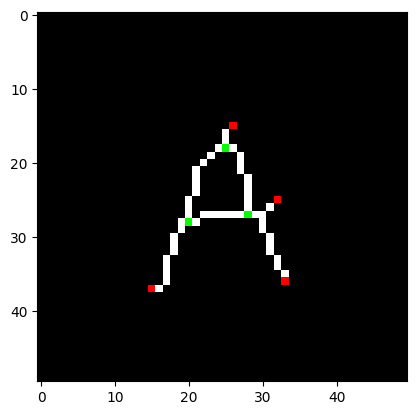

In [54]:
copy_skeleton = skeleton.copy()
image = Image.fromarray(copy_skeleton.astype(np.uint8) * 255)
rgb = image.convert('RGB')

for i in range(len(endpoints_coordinates)):
    rgb.putpixel((endpoints_coordinates[i][1], endpoints_coordinates[i][0]), (255, 0, 0))

for i in range(len(intersection_coordinates)):
    rgb.putpixel((intersection_coordinates[i][1], intersection_coordinates[i][0]), (0, 255, 0))

# rgb.show()

plt.imshow(rgb)